In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Problema de la Propina
Creemos un sistema de control difuso que modele cómo puede elegir dar propina en un restaurante. A la hora de dar propina, se tiene en cuenta el servicio y la calidad de la comida, valorada entre 0 y 10. Utiliza esto para dejar una propina de entre 0 y 25%.

Formularíamos este problema como:
- **Antecedente (entradas)**
    - **Servicio**
        - Universo (es decir, rango de valor nítido): ¿Qué tan bueno fue el servicio de los camareros, en una escala de 0 a 10?
        - Conjunto difuso (es decir, rango de valores difusos): pobre, aceptable, asombroso
    - **Calidad de la comida**
        - Universo: ¿Qué tan sabrosa fue la comida, en una escala de 0 a 10?
        - Conjunto difuso: malo, decente, genial
- **Consecuencias (salidas)**
    - **propina**
        - Universo: ¿Cuánto deberíamos dar de propina, en una escala del 0% al 25%?
        - Conjunto difuso: bajo, medio, alto
- **Normas**
    - SI el *servicio* fue bueno o la *calidad de la comida* , ENTONCES la propina será alta.
    - SI el *servicio* fue normal, ENTONCES la propina será media.
    - SI el *servicio* fue deficiente y la *calidad de la comida*, ENTONCES, la propina será baja.
- **Uso**
    - **Si le digo a este controlador que califiqué:**
        - el servicio como 9,8, y
        - la calidad como 6.5,
    - **recomendaría dejar:**
        - una propina del 20,2%.

## Variables de universo

In [2]:
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

## Auto-membresía
Es tres ya que esa es el tamaño del conjunto difuso que hay cada antecedente

In [3]:
quality.automf(3)
service.automf(3)

## Funciones de Membresía

In [4]:
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

C:\Users\samaf\OneDrive - Universidad de la Amazonia\Documentos\Estudios\Uniamazonia\Inteligencia Artificial - Septimo Semestre\ejercicios\logica-fuzzy\venv\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\samaf\OneDrive - Universidad de la Amazonia\Documentos\Estudios\Uniamazonia\Inteligencia Artificial - Septimo Semestre\ejercicios\logica-fuzzy\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\samaf\OneDrive - Universidad de la Amazonia\Documentos\Estudios\Uniamazonia\Inteligencia Artificial - Septimo Semestre\ejercicios\logica-fuzzy\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_

(None, None, None)

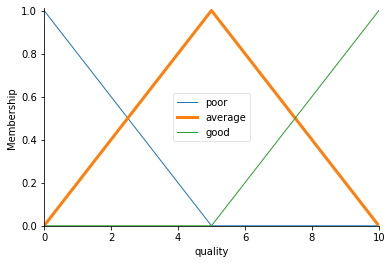

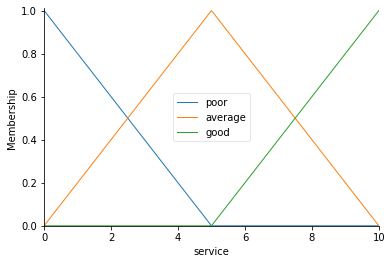

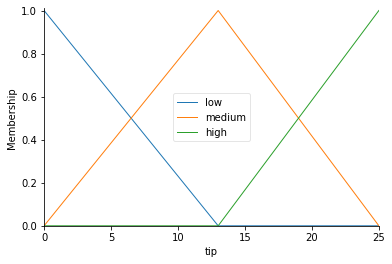

In [5]:
quality['average'].view(), service.view(), tip.view()

## Reglas difusas

In [6]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

## Mapeo de de la regla 1

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

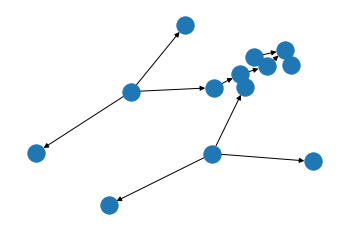

In [7]:
rule1.view()

## Creación y simulación de sistemas de control

In [8]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

## Ejemplo 1

In [9]:
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

tipping.compute()

In [10]:
outtip = tipping.output['tip']
outtip

19.847607361963192

In [11]:
f'La propina es de {outtip:0.2f}%'

'La propina es de 19.85%'

C:\Users\samaf\OneDrive - Universidad de la Amazonia\Documentos\Estudios\Uniamazonia\Inteligencia Artificial - Septimo Semestre\ejercicios\logica-fuzzy\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


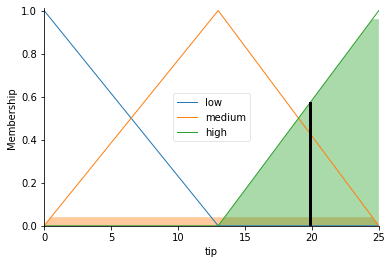

In [12]:
tip.view(sim=tipping)

## Example 2

In [13]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [14]:
tipping.input['quality'] = 2.1
tipping.input['service'] = 8.2

tipping.compute()

In [15]:
outtip = tipping.output['tip']
outtip

12.679191570641517

In [16]:
f'La propina es de {outtip:0.2f}%'

'La propina es de 12.68%'

C:\Users\samaf\OneDrive - Universidad de la Amazonia\Documentos\Estudios\Uniamazonia\Inteligencia Artificial - Septimo Semestre\ejercicios\logica-fuzzy\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


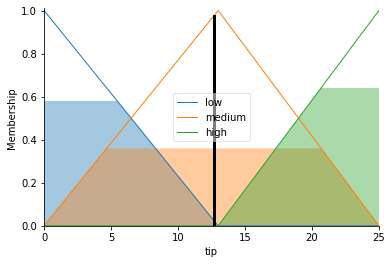

In [17]:
tip.view(sim=tipping)

## Ejemplo 3

In [18]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [19]:
tipping.input['quality'] = 9.7
tipping.input['service'] = 6.7

tipping.compute()

In [20]:
outtip = tipping.output['tip']
outtip

14.834415323442645

In [21]:
f'La propina es de {outtip:0.2f}%'

'La propina es de 14.83%'

C:\Users\samaf\OneDrive - Universidad de la Amazonia\Documentos\Estudios\Uniamazonia\Inteligencia Artificial - Septimo Semestre\ejercicios\logica-fuzzy\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


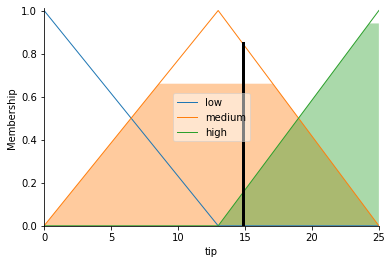

In [22]:
tip.view(sim=tipping)